# [Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/overview/description)

## Objective: 

- Build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year

## Goal:

1. Reduce unnecessary insurance cost, improve driver's willingness to buy vehicle insurance
2. Help insurance company to price their insurance produce more accurately, improve customer analysis and gain competitive advantage
3. Narrow down customer feature extraction area and reduce research cost, and speed up claim response

## Proposal

- **Business Analysis**: Reseach project background in kaggle discussion board to gain a better understanding on features and the project itself.

- **Data Analysis**: Analyze features to see if there is similarity in between. Determine which features are useful to the project. Determin ways to analyze features, such as data visualization. Determine which models are to be used to make predictions. 

# 1.  Porto Seguo - Data Overview¶

In this competition we are tasked with making predictive models that can predict if a given driver will make insurance claim. One of the key aspects of this dataset is that it has already been nicely cleaned, with many categorical information nicely labeled and name accordingly - some simply as unordered categorical features, other are with ordinal values that represent the underlying logic.

As directly quoted from the data description about different postfix:

- bin to indicate binary features  
- cat to indicate categorical features  
- Features without these designations are either continuous or ordinal  
- Additionally, value of -1 indicate missing values.  

## 1.1 Import packages

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# data
from sklearn.compose import ColumnTransformer, make_column_transformer

# Classifiers
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# classifiers / models
from sklearn.linear_model import LogisticRegression


from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

#other
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
    
)

from sklearn.metrics import roc_auc_score, roc_curve, auc

## 1.2 Read & Split the data

In [116]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sample_submission=pd.read_csv('./data/sample_submission.csv')

In [117]:
target = "target"
X_train, y_train = train.drop(columns=target), train[target]
X_train = X_train.drop(columns="id")
X_test = test.drop(columns="id")

In [118]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [119]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


In [120]:
def check_data(df):
    #check dataframe's first 5 and last 5 rows at once
    return df.head().append(df.tail())

check_data(train)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


## 1.3 Taking a Random Sample

In [121]:
#randomely select 5 samples from each target value:
positive_sample = train[train.target==1].sample(n=5, random_state=123)
negative_sample = train[train.target==0].sample(n=5, random_state=123)

sample = pd.concat([positive_sample, negative_sample]).reset_index()
sample

,index,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,354540,885885,1,2,1,9,0,0,0,1,...,6,1,1,7,0,1,0,1,1,0
1,131166,327764,1,7,3,7,0,0,0,0,...,13,1,1,8,0,0,1,0,0,0
2,166021,415019,1,2,1,5,0,5,0,1,...,3,2,2,14,0,1,1,0,0,0
3,339529,848228,1,5,1,2,0,0,0,0,...,4,1,6,8,0,0,0,1,1,1
4,299986,749566,1,1,1,6,1,0,1,0,...,10,3,3,11,0,0,1,0,0,0
5,379320,947975,0,1,2,1,0,0,1,0,...,4,2,5,5,0,1,0,0,0,0
6,33180,83183,0,1,1,4,0,0,0,1,...,3,0,4,14,0,1,1,0,0,0
7,60616,151937,0,0,1,6,0,0,1,0,...,7,1,3,4,0,0,1,0,1,0
8,254795,636826,0,0,1,3,0,0,1,0,...,3,0,2,9,0,1,1,0,0,0
9,372085,929986,0,0,1,5,1,0,0,0,...,6,3,2,9,0,0,0,0,1,1


In [122]:
sample_group = sample.groupby('target')
#list(sample.groupby('target'))

In [123]:
sample_group.ngroups

2

In [124]:
sample_group.size()

target
0    5
1    5
dtype: int64

In [125]:
sample_group.first()

,index,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
target,,,,,,,,,,,,,,,,,,,,,
0,379320,947975,1,2,1,0,0,1,0,0,...,4,2,5,5,0,1,0,0,0,0
1,354540,885885,2,1,9,0,0,0,1,0,...,6,1,1,7,0,1,0,1,1,0


In [126]:
sample_group.last()

,index,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
target,,,,,,,,,,,,,,,,,,,,,
0,372085,929986,0,1,5,1,0,0,0,0,...,6,3,2,9,0,0,0,0,1,1
1,299986,749566,1,1,6,1,0,1,0,0,...,10,3,3,11,0,0,1,0,0,0


In [127]:
sample_group.get_group(1)

,index,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,354540,885885,2,1,9,0,0,0,1,0,...,6,1,1,7,0,1,0,1,1,0
1,131166,327764,7,3,7,0,0,0,0,0,...,13,1,1,8,0,0,1,0,0,0
2,166021,415019,2,1,5,0,5,0,1,0,...,3,2,2,14,0,1,1,0,0,0
3,339529,848228,5,1,2,0,0,0,0,1,...,4,1,6,8,0,0,0,1,1,1
4,299986,749566,1,1,6,1,0,1,0,0,...,10,3,3,11,0,0,1,0,0,0


## *Using filter*

In [128]:
# using filter to filter sample
sample_group.filter(lambda x:x['ps_calc_13'].max()>5 and x['ps_calc_11'].min()<6)

,index,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,354540,885885,2,1,9,0,0,0,1,0,...,6,1,1,7,0,1,0,1,1,0
1,131166,327764,7,3,7,0,0,0,0,0,...,13,1,1,8,0,0,1,0,0,0
2,166021,415019,2,1,5,0,5,0,1,0,...,3,2,2,14,0,1,1,0,0,0
3,339529,848228,5,1,2,0,0,0,0,1,...,4,1,6,8,0,0,0,1,1,1
4,299986,749566,1,1,6,1,0,1,0,0,...,10,3,3,11,0,0,1,0,0,0


# Using isin to count specific values' occurrence

In [129]:
#% of missing values (represented by -1) in each feature
train.isin(['-1']).sum(axis=0)/train.shape[0]*100

id                 0.000000
target             0.000000
ps_ind_01          0.000000
ps_ind_02_cat      0.036290
ps_ind_03          0.000000
ps_ind_04_cat      0.013945
ps_ind_05_cat      0.975955
ps_ind_06_bin      0.000000
ps_ind_07_bin      0.000000
ps_ind_08_bin      0.000000
ps_ind_09_bin      0.000000
ps_ind_10_bin      0.000000
ps_ind_11_bin      0.000000
ps_ind_12_bin      0.000000
ps_ind_13_bin      0.000000
ps_ind_14          0.000000
ps_ind_15          0.000000
ps_ind_16_bin      0.000000
ps_ind_17_bin      0.000000
ps_ind_18_bin      0.000000
ps_reg_01          0.000000
ps_reg_02          0.000000
ps_reg_03         18.106490
ps_car_01_cat      0.017977
ps_car_02_cat      0.000840
ps_car_03_cat     69.089837
ps_car_04_cat      0.000000
ps_car_05_cat     44.782531
ps_car_06_cat      0.000000
ps_car_07_cat      1.930237
ps_car_08_cat      0.000000
ps_car_09_cat      0.095596
ps_car_10_cat      0.000000
ps_car_11_cat      0.000000
ps_car_11          0.000840
ps_car_12          0

In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

Observation: there are both int64 and float64 dtype, which means the data has been processed beforehand. 


Features:

1. bin-> binary
2. cat->categorical (nominal)
3. dtype:int-> ordinal
4. dtype:float64->continuous interval


## 1.4 Creating a meta data table

In [131]:
#generate a meta data table

data = []

for col in train.columns:
    #defining the role
    if col == 'target':
        role = "target"
    elif col == 'id':
        role = 'id'
    else:
        role = 'feature'
        
    #defining the level
    if 'bin' in col or col=='target':
        level = 'binary'
    elif 'cat' in col or col == 'id':
        level = 'nominal'
    elif train[col].dtype == 'float64':
        level = 'interval'
    elif train[col].dtype == 'int64':
        level = 'ordinal'

    #defining the data type:
    dtype = train[col].dtype
    
    #initialize keep = True for all features except ID
    keep = True
    if col == 'id':
        keep = False


    
# creating the meta data table

    col_dict = {
        "Variable Name": col,
        "Role": role,
        "Level": level,
        "data_type": dtype,
        "Keep": keep
    }
    
    data.append(col_dict)
    
meta = pd.DataFrame(data, columns=["Variable Name", "Role", "Level", "data_type", "Keep"])
meta.set_index('Variable Name', inplace=True)

meta["Unique_values"] = [len(set(train[col])) for col in train.columns]
meta["Count_Missing_values"] = train.isin(['-1']).sum(axis=0)
meta["Count_Missing_values_Percentage"] = round(train.isin(['-1']).sum(axis=0)/train.shape[0]*100, 2)
meta

,Role,Level,data_type,Keep,Unique_values,Count_Missing_values,Count_Missing_values_Percentage
Variable Name,,,,,,,
id,id,nominal,int64,False,595212,0,0.00
target,target,binary,int64,True,2,0,0.00
ps_ind_01,feature,ordinal,int64,True,8,0,0.00
ps_ind_02_cat,feature,nominal,int64,True,5,216,0.04
ps_ind_03,feature,ordinal,int64,True,12,0,0.00
ps_ind_04_cat,feature,nominal,int64,True,3,83,0.01
ps_ind_05_cat,feature,nominal,int64,True,8,5809,0.98
ps_ind_06_bin,feature,binary,int64,True,2,0,0.00
ps_ind_07_bin,feature,binary,int64,True,2,0,0.00


In [132]:
pd.DataFrame(
    {'Count': meta.groupby(['Role', 'Level']).size()}
)

Count
Role    Level          
feature binary       17
        interval     10
        nominal      14
        ordinal      16
id      nominal       1
target  binary        1

In [133]:
# look at interval(numerical) features statistics
stats = train[meta[(meta["Level"]=="interval")].index].describe()

stats

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


In [134]:
#which interval features have missing value (i.e. -1)?

stats.loc["min", :][stats.loc["min", :]==-1].index 

#or 

stats.columns[stats.loc["min", :]==-1]

Index(['ps_reg_03', 'ps_car_12', 'ps_car_14'], dtype='object')

In [135]:
#which interval feature has the least std?

stats.columns[stats.loc['std', :].argmin()]

#or

stats.loc['std', :].index[stats.loc['std', :].argmin()]

'ps_car_12'

In [136]:
#which interval features have a max value larger than 4?

stats.loc["max", :][stats.loc["max", :] > 4].index

Index(['ps_reg_03'], dtype='object')

In [137]:
#which ones are calc interval features?

# calc_col_intervals = [col for col in stats.columns if "calc" in col]

# or 

calc_col_intervals = [col for col in meta[(meta["Level"] == "interval")].index if "calc" in col]


calc_col_intervals

['ps_calc_01', 'ps_calc_02', 'ps_calc_03']

In [138]:
# btw how to filter rows with multiple conditions?

# rememmber to add () in between

# e.g.

In [139]:
meta[(meta["Level"] == "interval") & (meta["Unique_values"] >10)]

,Role,Level,data_type,Keep,Unique_values,Count_Missing_values,Count_Missing_values_Percentage
Variable Name,,,,,,,
ps_reg_02,feature,interval,float64,True,19,0,0.00
ps_reg_03,feature,interval,float64,True,5013,107772,18.11
ps_car_12,feature,interval,float64,True,184,1,0.00
ps_car_13,feature,interval,float64,True,70482,0,0.00
ps_car_14,feature,interval,float64,True,850,42620,7.16
ps_car_15,feature,interval,float64,True,15,0,0.00


In [140]:
train[calc_col_intervals].describe()

,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000
mean,0.449756,0.449589,0.449849
std,0.287198,0.286893,0.287153
min,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.200000
50%,0.500000,0.400000,0.500000
75%,0.700000,0.700000,0.700000
max,0.900000,0.900000,0.900000


### obersvation from above
### 1. calculated interval features have a very similar distribution (mean, std are close)
### 2. seem to be ratio data (max <1, min >=0, maybe log transformation, maybe scaled)

### maybe no need to use all three of them

In [141]:
#Check class imbalance

train['target'].value_counts(normalize=True)

0    0.963552
1    0.036448
Name: target, dtype: float64

In [142]:
train['target'].describe()

count    595212.000000
mean          0.036448
std           0.187401
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: target, dtype: float64

<AxesSubplot:>

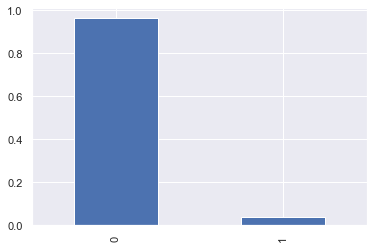

In [143]:
train['target'].value_counts(normalize=True).plot(kind="bar")

### Observation above: class imbalance

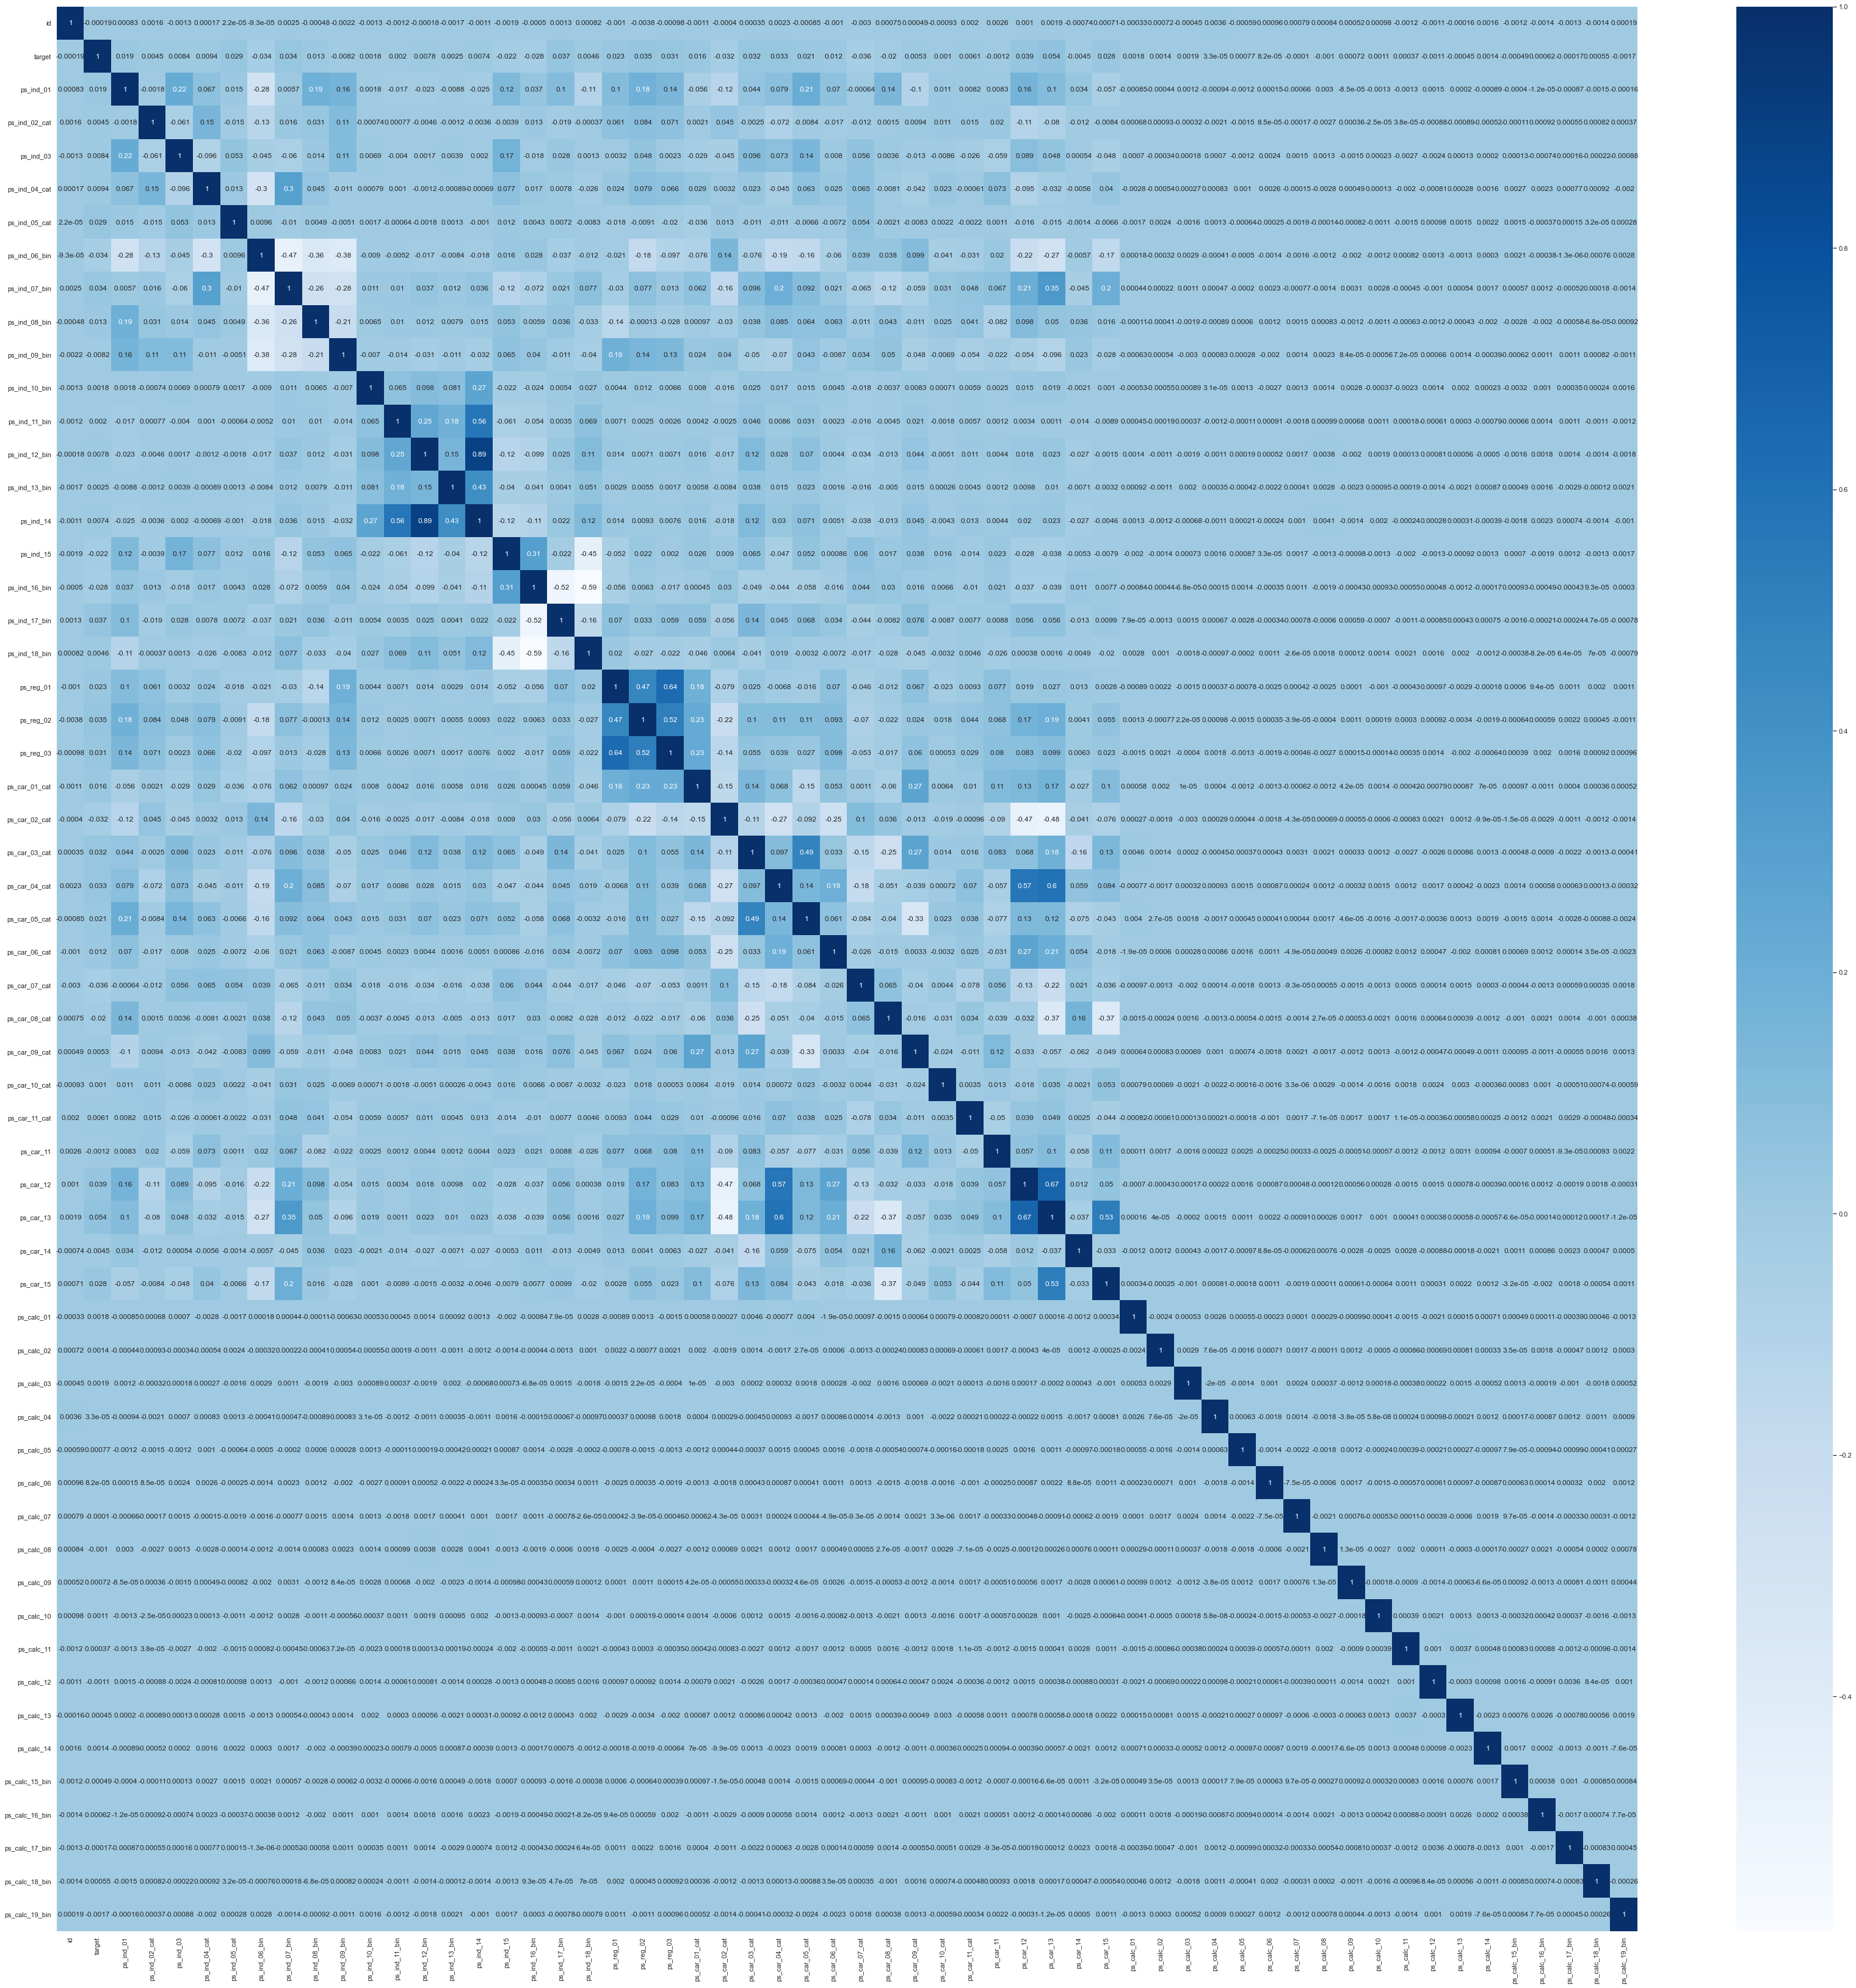

In [103]:
cor = train.iloc[:,:58].corr();
plt.figure(figsize=(58,58))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

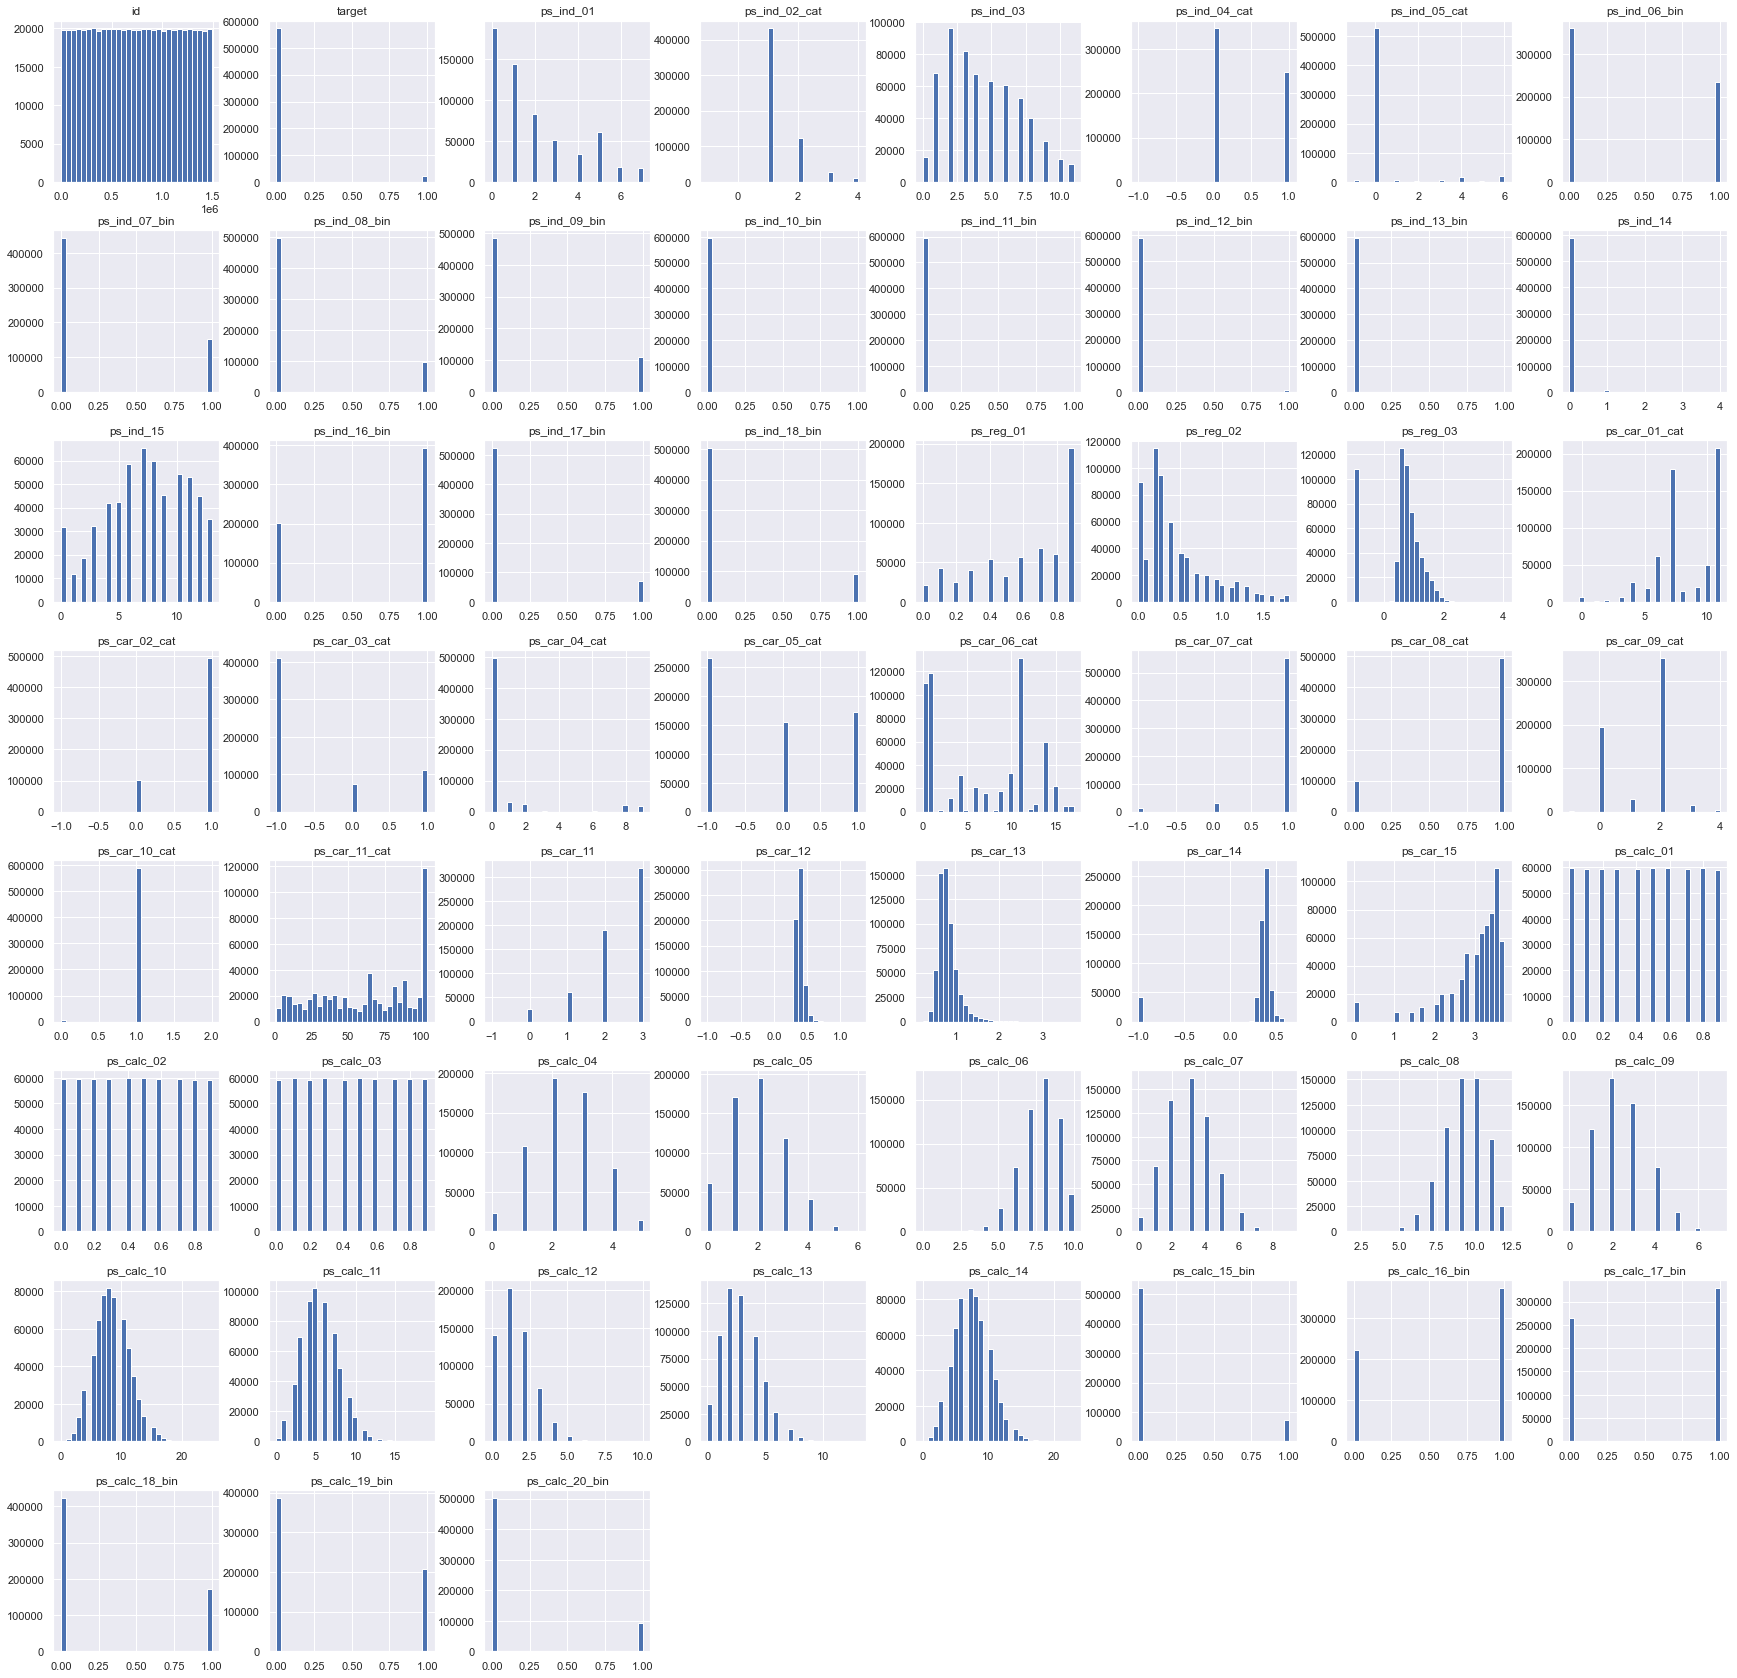

In [104]:
train.hist(figsize=(30,30), bins=30);

In [32]:
# for col in feature_stat[feature_stat['feature'].str.contains("cat")].feature:
#      train.groupby("target")[col].plot(kind='density', legend=True);
#     print (col)

## 1.5 A Closer Look at Categorical Feature

In [144]:
traintest=train.drop(['id','target'], axis=1).append(test.drop(['id'], axis=1))
cols=traintest.columns


In [145]:
stat_cols= ['nunique','freq1','freq1_val', 'freq2', 'req2_val',
             'freq3', 'freq3_val'] + traintest[cols[0]].describe().index.tolist()[1:]

stat_cols=['feature']+stat_cols

feature_stat=pd.DataFrame(columns=stat_cols)
i=0

for col in cols:
    stat_vals=[]
    
    # get stat value
    stat_vals.append(col)
    stat_vals.append(traintest[col].nunique())
    stat_vals.append(traintest[col].value_counts().index[0])
    stat_vals.append(traintest[col].value_counts().iloc[0])
    stat_vals.append(traintest[col].value_counts().index[1])
    stat_vals.append(traintest[col].value_counts().iloc[1])
    
    if len(traintest[col].value_counts())>2:
        stat_vals.append(traintest[col].value_counts().index[2])
        stat_vals.append(traintest[col].value_counts().iloc[2])
    else:
        stat_vals.append(np.nan)
        stat_vals.append(np.nan)
            
    stat_vals+=traintest[col].describe().tolist()[1:]

    feature_stat.loc[i]=stat_vals
    i+=1

In [146]:
feature_stat[feature_stat['feature'].str.contains("cat")].sort_values(by=['nunique'])

,feature,nunique,freq1,freq1_val,freq2,req2_val,freq3,freq3_val,mean,std,min,25%,50%,75%,max
28,ps_car_08_cat,2,1,1238365,0,249663,NaN,NaN,0.832219,0.373672,0.0,1.0,1.0,1.0,1.0
3,ps_ind_04_cat,3,0,866864,1,620936,-1,228,0.417135,0.493396,-1.0,0.0,0.0,1.0,1.0
22,ps_car_02_cat,3,1,1234979,0,253039,-1,10,0.829937,0.375706,-1.0,1.0,1.0,1.0,1.0
23,ps_car_03_cat,3,-1,1028142,1,276842,0,183044,-0.504896,0.788713,-1.0,-1.0,-1.0,0.0,1.0
25,ps_car_05_cat,3,-1,666910,1,431560,0,389558,-0.158162,0.844506,-1.0,-1.0,0.0,1.0,1.0
27,ps_car_07_cat,3,1,1383070,0,76138,-1,28820,0.910097,0.347212,-1.0,1.0,1.0,1.0,1.0
30,ps_car_10_cat,3,1,1475460,0,12136,2,432,0.992135,0.091565,0.0,1.0,1.0,1.0,2.0
1,ps_ind_02_cat,5,1,1079327,2,309747,3,70172,1.358745,0.663639,-1.0,1.0,1.0,2.0,4.0
29,ps_car_09_cat,6,2,883326,0,486510,1,72947,1.328302,0.978743,-1.0,0.0,2.0,2.0,4.0
4,ps_ind_05_cat,8,0,1319412,6,51877,4,45706,0.406955,1.353300,-1.0,0.0,0.0,0.0,6.0


Multiple categorical features and multiple levels detected.

## 1.6 Categorical features encoding
Categorical features in this dataset are encoded in a numeric manner, i.e. we have '0', '1', '2' representing different classes of some car related concepts like 'FWD', 'RWD', '4WD' for drive types. It is a nice way to represent information that is not in numeric format - since most ML algorthims prefer number over string.

This does present a problem, as you can imagine, there isn't necessary a logical order to rank different drive types from 'FF' to '4DW in an ordinal manner i.e. '0','1','2'. Now that we encoding them in such a way, we have actually manually imposed such an ordinal logic which doesn't necessary exist within the observations.

Let's apply some tricks present them in a non-ordinal way, here we are going to use **"frequency encoding"** and **"binary encoding"**

### **1.6.1 Frequency Encoding**   
The idea behind frequency encoding is to represent the levels within a categorical features with the frequency they are observe in a dataset. One of the reaons of doing this is more frequently observed level often behave in a similar way - but this is not always true. In the end we need our cross-validation effort to tell us if this is indeed helpful.

In [147]:
# refer to https://www.kaggle.com/yifanxie/porto-seguro-tutorial-end-to-end-ensemble

# This function takes in a list of features 'cols' from train and test dataset, 
# and performing frequency encoding. 
def freq_encoding(cols, train_df, test_df):
    # we are going to store our new dataset in these two resulting datasets
    result_train_df=pd.DataFrame()
    result_test_df=pd.DataFrame()
    
    # loop through each feature column to do this
    for col in cols:
        
        # capture the frequency of a feature in the training set in the form of a dataframe
        col_freq=col+'_freq'
        freq=train_df[col].value_counts()
        freq=pd.DataFrame(freq)
        freq.reset_index(inplace=True)
        freq.columns=[col,col_freq]
        

        # merge ths 'freq' datafarme with the train data
        temp_train_df=pd.merge(train_df[[col]], freq, how='left', on=col)
        temp_train_df.drop([col], axis=1, inplace=True)

        # merge this 'freq' dataframe with the test data
        temp_test_df=pd.merge(test_df[[col]], freq, how='left', on=col)
        temp_test_df.drop([col], axis=1, inplace=True)

        # if certain levels in the test dataset is not observed in the train dataset, 
        # we assign frequency of zero to them
        temp_test_df.fillna(0, inplace=True)
        temp_test_df[col_freq]=temp_test_df[col_freq].astype(np.int32)

        if result_train_df.shape[0]==0:
            result_train_df=temp_train_df
            result_test_df=temp_test_df
        else:
            result_train_df=pd.concat([result_train_df, temp_train_df],axis=1)
            result_test_df=pd.concat([result_test_df, temp_test_df],axis=1)
    
    return result_train_df, result_test_df

In [148]:
categorical_features = list(feature_stat[feature_stat['feature'].str.contains("cat")].feature)
train_freq_encoded, test_freq_encoded = freq_encoding(categorical_features, X_train, X_test)

In [149]:
train_freq_encoded

,ps_ind_02_cat_freq,ps_ind_04_cat_freq,ps_ind_05_cat_freq,ps_car_01_cat_freq,ps_car_02_cat_freq,ps_car_03_cat_freq,ps_car_04_cat_freq,ps_car_05_cat_freq,ps_car_06_cat_freq,ps_car_07_cat_freq,ps_car_08_cat_freq,ps_car_09_cat_freq,ps_car_10_cat_freq,ps_car_11_cat_freq
0,123573,248164,528009,50087,493990,411231,496581,172667,31136,553148,99948,194518,590179,7246
1,431859,346965,528009,207573,493990,411231,496581,266551,131527,553148,495264,353482,590179,5097
2,11378,248164,528009,179247,493990,411231,496581,266551,59253,553148,495264,353482,590179,7992
3,431859,346965,528009,179247,493990,73272,496581,172667,131527,553148,495264,14756,590179,85083
4,123573,248164,528009,207573,493990,411231,496581,266551,59253,553148,495264,353482,590179,10470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,431859,346965,528009,50087,493990,411231,496581,172667,118386,553148,495264,194518,590179,5285
595208,431859,346965,528009,20323,493990,411231,496581,266551,21732,30575,99948,353482,590179,1103
595209,431859,346965,528009,179247,493990,411231,496581,266551,118386,553148,495264,353482,590179,5285
595210,123573,248164,528009,207573,493990,411231,496581,266551,131527,553148,495264,353482,590179,7339


In [150]:
X_train=pd.concat([X_train, train_freq_encoded], axis=1)
X_test=pd.concat([X_test,test_freq_encoded], axis=1)

In [151]:
X_train

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_car_02_cat_freq,ps_car_03_cat_freq,ps_car_04_cat_freq,ps_car_05_cat_freq,ps_car_06_cat_freq,ps_car_07_cat_freq,ps_car_08_cat_freq,ps_car_09_cat_freq,ps_car_10_cat_freq,ps_car_11_cat_freq
0,2,2,5,1,0,0,1,0,0,0,...,493990,411231,496581,172667,31136,553148,99948,194518,590179,7246
1,1,1,7,0,0,0,0,1,0,0,...,493990,411231,496581,266551,131527,553148,495264,353482,590179,5097
2,5,4,9,1,0,0,0,1,0,0,...,493990,411231,496581,266551,59253,553148,495264,353482,590179,7992
3,0,1,2,0,0,1,0,0,0,0,...,493990,73272,496581,172667,131527,553148,495264,14756,590179,85083
4,0,2,0,1,0,1,0,0,0,0,...,493990,411231,496581,266551,59253,553148,495264,353482,590179,10470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,3,1,10,0,0,0,0,0,1,0,...,493990,411231,496581,172667,118386,553148,495264,194518,590179,5285
595208,5,1,3,0,0,0,0,0,1,0,...,493990,411231,496581,266551,21732,30575,99948,353482,590179,1103
595209,1,1,10,0,0,1,0,0,0,0,...,493990,411231,496581,266551,118386,553148,495264,353482,590179,5285
595210,5,2,3,1,0,0,0,1,0,0,...,493990,411231,496581,266551,131527,553148,495264,353482,590179,7339


## **1.6.2 Binary Encoding**

In [152]:
# refer to https://www.kaggle.com/yifanxie/porto-seguro-tutorial-end-to-end-ensemble


# perform binary encoding for categorical variable
# this function take in a pair of train and test data set, and the feature that need to be encode.
# it returns the two dataset with input feature encoded in binary representation
# this function assumpt that the feature to be encoded is already been encoded in a numeric manner 
# ranging from 0 to n-1 (n = number of levels in the feature). 

def binary_encoding(train_df, test_df, feat):
    # calculate the highest numerical value used for numeric encoding
    train_feat_max = train_df[feat].max()
    test_feat_max = test_df[feat].max()
    if train_feat_max > test_feat_max:
        feat_max = train_feat_max
    else:
        feat_max = test_feat_max
        
    # use the value of feat_max+1 to represent missing value
    train_df.loc[train_df[feat] == -1, feat] = feat_max + 1
    test_df.loc[test_df[feat] == -1, feat] = feat_max + 1
    
    # create a union set of all possible values of the feature
    union_val = np.union1d(train_df[feat].unique(), test_df[feat].unique())

    # extract the highest value from from the feature in decimal format.
    max_dec = union_val.max()
    
    # work out how the ammount of digits required to be represent max_dev in binary representation
    max_bin_len = len("{0:b}".format(max_dec))
    index = np.arange(len(union_val))
    columns = list([feat])
    
    # create a binary encoding feature dataframe to capture all the levels for the feature
    bin_df = pd.DataFrame(index=index, columns=columns)
    bin_df[feat] = union_val
    
    # capture the binary representation for each level of the feature 
    feat_bin = bin_df[feat].apply(lambda x: "{0:b}".format(x).zfill(max_bin_len))
    
    # split the binary representation into different bit of digits 
    splitted = feat_bin.apply(lambda x: pd.Series(list(x)).astype(np.uint8))
    splitted.columns = [feat + '_bin_' + str(x) for x in splitted.columns]
    bin_df = bin_df.join(splitted)
    
    # merge the binary feature encoding dataframe with the train and test dataset - Done! 
    train_df = pd.merge(train_df, bin_df, how='left', on=[feat])
    test_df = pd.merge(test_df, bin_df, how='left', on=[feat])
    return train_df, test_df

In [153]:
# binary_encoding(train, test, categorical_features) 
col_cat = ['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
#  'ps_car_03_cat',
 'ps_car_04_cat',
#  'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

for col in col_cat:
    X_train, X_test=binary_encoding(X_train, X_test, col)


In [154]:
X_train

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_car_09_cat_bin_2,ps_car_10_cat_bin_0,ps_car_10_cat_bin_1,ps_car_11_cat_bin_0,ps_car_11_cat_bin_1,ps_car_11_cat_bin_2,ps_car_11_cat_bin_3,ps_car_11_cat_bin_4,ps_car_11_cat_bin_5,ps_car_11_cat_bin_6
0,2,2,5,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,1,1,7,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
2,5,4,9,1,0,0,0,1,0,0,...,0,0,1,0,1,1,1,1,0,0
3,0,1,2,0,0,1,0,0,0,0,...,1,0,1,1,1,0,1,0,0,0
4,0,2,0,1,0,1,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,3,1,10,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,1,1,1
595208,5,1,3,0,0,0,0,0,1,0,...,0,0,1,0,1,1,1,1,1,1
595209,1,1,10,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,1,1,1
595210,5,2,3,1,0,0,0,1,0,0,...,0,0,1,1,1,0,0,1,0,1


# Preprocessing and transformations:

In [155]:
#identify feature types
calc_features_to_drop = list(train.columns[train.columns.str.startswith('ps_calc_')])
drop_features = ['ps_car_03_cat', 'ps_car_05_cat'] + calc_features_to_drop # drop because more than 10% missing value
# target = "target"
# binary_features = list(meta[(meta["Level"]=='binary')].index)
# binary_features.remove('target')
# ordinal_encoded_features = list(meta[(meta["Level"]=='ordinal')].index)
# categorical_features = list(meta[(meta["Level"]=='nominal')].index)
# categorical_features.remove('id')
# numeric_features = list(set(train.columns)
#                        -set(drop_features)
#                        -set([target])
#                        -set(binary_features)
#                        -set(ordinal_encoded_features)
#                        -set(categorical_features)
#                        )

In [156]:
# assert(len(binary_features)+len(ordinal_encoded_features)+len(categorical_features)+len(numeric_features) == train.shape[1]-2)

In [157]:
preprocessor = make_column_transformer(
    ("drop", drop_features),
    #(OneHotEncoder(drop="if_binary"), binary_features),
    (StandardScaler(), list(set(X_train.columns)-set(drop_features))),
    #(OneHotEncoder(handle_unknown="ignore"), categorical_features),
    #(StandardScaler(), numeric_features),
)

In [1]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation
    """
    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [2]:
def gini(y, pred):
    fpr, tpr, thr = roc_curve(y, pred, pos_label=1)
    g = 2 * auc(fpr, tpr) - 1
    return g

# 6. Baseline model (DummyClassifier)

In [64]:
#make a cusomized f1 scorering method

from sklearn.metrics import f1_score, make_scorer, recall_score

custom_scorer = make_scorer(f1_score, average="macro")
scoring_metric = custom_scorer

In [65]:
train=pd.read_csv('./data/train_balanced_update.csv', index_col = 0)
target="target"
X_train, y_train = train.drop(columns=target), train[target]

In [66]:
dummy = DummyClassifier(strategy = "stratified")

results = {}
scoring_metric = scoring_metric
results["Dummy"] = mean_std_cross_val_scores(dummy, X_train, y_train, 
                                             return_train_score=True, scoring=scoring_metric)
pd.DataFrame(results)

,Dummy
fit_time,0.024 (+/- 0.014)
score_time,0.008 (+/- 0.001)
test_score,0.499 (+/- 0.001)
train_score,0.498 (+/- 0.001)


# Linear Model - Logistic Regression

In [54]:
meta = pd.read_csv('./data/final_meta.csv', index_col=0)

In [67]:
meta = meta.loc[[col for col in meta.index if 'calc' not in col and col!='id']]

In [68]:
X_train = X_train[[col for col in meta.index if 'calc' not in col and col!='target']]
X_train

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_car_11_cat_tar_enc
0,2,1,9,1,0,0,0,1,0,0,...,1,2,1,104,0,0.422019,0.587297,0.411704,1.414214,0.180276
1,1,1,2,1,0,0,1,0,0,0,...,1,0,1,89,2,0.387298,0.893896,0.410122,3.316625,0.194098
2,7,1,6,0,4,0,0,0,1,0,...,1,0,1,57,2,0.374166,0.721955,0.392428,3.162278,0.104634
3,1,1,3,0,0,1,0,0,0,0,...,1,0,1,104,0,0.529150,1.039926,0.510588,3.316625,0.180926
4,6,2,7,1,0,0,1,0,0,0,...,1,0,1,38,3,0.316228,0.694816,0.359861,3.316625,0.129199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144621,5,1,7,0,3,0,0,1,0,0,...,1,2,1,104,1,0.424264,1.269111,0.384708,3.162278,0.184536
144622,1,1,5,0,0,0,0,1,0,0,...,1,2,1,5,2,0.424264,0.756979,0.400000,2.000000,0.171420
144623,0,1,6,1,0,0,1,0,0,0,...,1,1,1,104,3,0.400000,0.970654,0.372424,3.464102,0.183540
144624,0,2,2,0,0,1,0,0,0,0,...,0,2,1,104,2,0.316228,0.876295,0.320780,3.741657,0.177236


In [72]:

binary_features = list(meta[(meta["Level"]=='binary')].index)
binary_features.remove('target')
ordinal_features = list(meta[(meta["Level"]=='ordinal')].index)
categorical_features = list(meta[(meta["Level"]=='nominal')].index)

categorical_features.remove('ps_car_11_cat')
categorical_features.remove('ps_car_03_cat')
categorical_features.remove('ps_car_05_cat')
ratio_features = list(meta[(meta["Level"]=='ratio')].index)
numeric_features = list(set(meta.T.columns)
                       -set([target])
                       -set(binary_features)
                       -set(ordinal_features)
                       -set(categorical_features)
                       -set(ratio_features)
                       )


In [74]:
preprocessor = make_column_transformer(
    ('passthrough', binary_features),
    (OneHotEncoder(handle_unknown='ignore'), ordinal_features),
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('passthrough', ratio_features),
    (StandardScaler(), numeric_features)
)

In [75]:
#Try logistic regression with default C
pipe_lr = make_pipeline(
    preprocessor, LogisticRegression(max_iter=1000, class_weight="balanced")
)
results["logreg"] = mean_std_cross_val_scores(
    pipe_lr, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results)

,Dummy,logreg
fit_time,0.024 (+/- 0.014),18.771 (+/- 1.751)
score_time,0.008 (+/- 0.001),0.105 (+/- 0.001)
test_score,0.499 (+/- 0.001),0.569 (+/- 0.002)
train_score,0.498 (+/- 0.001),0.921 (+/- 0.001)


In [73]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('passthrough-1',
                                                  'passthrough',
                                                  ['ps_ind_06_bin',
                                                   'ps_ind_07_bin',
                                                   'ps_ind_08_bin',
                                                   'ps_ind_09_bin',
                                                   'ps_ind_10_bin',
                                                   'ps_ind_11_bin',
                                                   'ps_ind_12_bin',
                                                   'ps_ind_13_bin',
                                                   'ps_ind_16_bin',
                                                   'ps_ind_17_bin',
                                                   'ps_ind_18_bin',
                                                   'ps_calc_15_bin',
             

In [77]:
y_pred = pipe_lr.predict(X_train)

In [78]:
print(gini(y_train, y_pred))

0.9467266531246046


In [76]:
ratio = np.bincount(y_train)[0] / np.bincount(y_train)[1]
ratio

5.6666359362035585

In [77]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


models = {

#     "random forest": RandomForestClassifier(n_estimators=250, n_jobs=6, min_samples_split=5, max_depth=7,
#                           criterion='gini', random_state=0),
#     "xgboost": XGBClassifier(scale_pos_weight=ratio, random_state=2),
    "lgbm": LGBMClassifier(scale_pos_weight=ratio, random_state=2),
}

for name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    results[name] = mean_std_cross_val_scores(
        pipe, X_train, y_train, return_train_score=True, scoring=scoring_metric
    )



In [78]:
pd.DataFrame(results)

,Dummy,logreg,lgbm
fit_time,0.024 (+/- 0.014),18.771 (+/- 1.751),1.056 (+/- 0.057)
score_time,0.008 (+/- 0.001),0.105 (+/- 0.001),0.188 (+/- 0.006)
test_score,0.499 (+/- 0.001),0.569 (+/- 0.002),0.526 (+/- 0.002)
train_score,0.498 (+/- 0.001),0.921 (+/- 0.001),0.561 (+/- 0.001)
